<a href="https://colab.research.google.com/github/swamivisal/Pet-Image-Classification/blob/main/CAT_DOG_TRAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing the libraries**

In [3]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,MaxPool2D,Dropout
from random import shuffle
from tensorflow.keras.callbacks import ModelCheckpoint

##**Preprocessing the training and validation data**

(24946, 2)
(20000, 50, 50, 3)
(20000,)


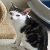

Cat


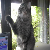

Cat


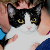

Cat


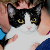

Cat


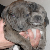

Dog


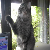

Cat


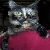

Cat


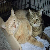

Cat


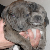

Dog


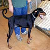

Dog


In [8]:

#def augment(img):
#M=cv2.getRotationMatrix2D((25,25),np.random.randint(-10,11),1)
#img=cv2.warpAffine(img,M,(50,50))
#return img


path = "/content/drive/MyDrive/Computer Vision/TRAIN.npy"

classes = ["Cat","Dog"]
dataset = np.load(path,allow_pickle=True)
print(dataset.shape)
shuffle(dataset)
inputs= [] 
targets = []

for x,y in dataset[:20000]:
  inputs.append(x)
  targets.append(y)

inputs=np.array(inputs)
targets=np.array(targets)
print(inputs.shape)
print(targets.shape)
normalised_inputs=inputs/255.0  
for i in range(10):
  cv2_imshow(inputs[i])
  print(classes[targets[i]])

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Creating the Model Architecture**

In [ ]:
model = keras.Sequential()
model.add(Conv2D(32,(3,3),padding="same",input_shape=normalised_inputs.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(64,(3,3),padding="same"))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(128,(3,3),padding="same"))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(256,(3,3),padding="same"))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation('sigmoid'))



##**Compiling the CNN and training the model on training data and saving the best model with the less validation loss**

In [ ]:
model.compile(loss="binary_crossentropy",optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])
filepath="/content/drive/MyDrive/Computer Vision/Model/best.hdf5"
checkpoint=ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True,mode='min')
model.fit(normalised_inputs,targets,validation_split=0.05,batch_size=64,epochs=20,callbacks=[checkpoint])

Epoch 1/20
297/297 [==============================] - 7s 22ms/step - loss: 0.6424 - accuracy: 0.6185 - val_loss: 0.6135 - val_accuracy: 0.6860

Epoch 00001: val_loss improved from inf to 0.61346, saving model to /content/drive/MyDrive/Computer Vision/Model/best.hdf5
Epoch 2/20
297/297 [==============================] - 6s 22ms/step - loss: 0.5171 - accuracy: 0.7453 - val_loss: 0.5185 - val_accuracy: 0.7690

Epoch 00002: val_loss improved from 0.61346 to 0.51849, saving model to /content/drive/MyDrive/Computer Vision/Model/best.hdf5
Epoch 3/20
297/297 [==============================] - 6s 22ms/step - loss: 0.4231 - accuracy: 0.8068 - val_loss: 0.4750 - val_accuracy: 0.7920

Epoch 00003: val_loss improved from 0.51849 to 0.47500, saving model to /content/drive/MyDrive/Computer Vision/Model/best.hdf5
Epoch 4/20
297/297 [==============================] - 6s 22ms/step - loss: 0.3541 - accuracy: 0.8455 - val_loss: 0.3997 - val_accuracy: 0.8400

Epoch 00004: val_loss improved from 0.47500 to 